<a href="https://colab.research.google.com/github/CarlosLopes88/04_Optimization_models/blob/main/Prob_mix_prod_min_custo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gurobipy

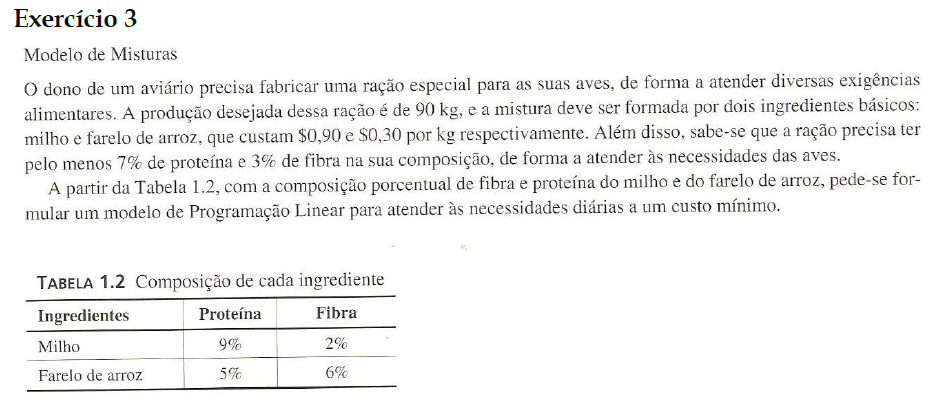

# Modelagem

### Variáveis de decisão:


$x_1 \colon \text{quantidade de milho usado em kg na mistura}$

$x_2 \colon \text{quantidade de farelo de arroz usado em kg na mistura}$

### Função objetivo:

$\mathrm{min} \; Z = 0,90*x_1 + 0,30*x_2$

### Restrições:

$x_1 + x_2 \leq 90$

$0,09*x_1 + 0,05*x_2 \leq 0,07$

$0,02*x_1 + 0,06*x_2 \leq 0,03$

$x_1, x_2 \geq 0$

In [ ]:
import gurobipy as gp

In [ ]:
# Criando o modelo

modelo = gp.Model()

In [ ]:
# Adicinar variavéis de decisão

x1 = modelo.addVar(vtype='I')
x2 = modelo.addVar(vtype='I')


In [ ]:
# Função objetivo

modelo.setObjective( x1 * 0.90 + x2 * 0.30)

In [ ]:
# Sujeito as seguintes restrições

c1 = modelo.addConstr( x1 + x2 == 90)

c2 = modelo.addConstr((x1 * 0.09 + x2 * 0.05) >= (x1 + x2) * 0.07)

c3 = modelo.addConstr((x1 * 0.02 + x2 * 0.06) >= (x1 + x2) * 0.03)

c4 = modelo.addConstr(x1 + x2 >= 0)

In [ ]:
# Resolver o modelo

modelo.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 4 rows, 2 columns and 8 nonzeros
Model fingerprint: 0xc144abf2
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [3e-01, 9e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+01, 9e+01]
Presolve removed 4 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 54 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.400000000000e+01, best bound 5.400000000000e+01, gap 0.0000%


In [ ]:
# mix de produção

print("Produto A:",x1.X)
print("Produto B:",x2.X)

print("Custo total:",modelo.objVal)


Produto A: 45.0
Produto B: 45.0
Custo total: 54.0
